In [17]:
import pandas
import math
import numpy
import json
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import PIL
import pickle

In [18]:
df = pandas.read_csv('ZnacheniyaSvoystvModeli.csv', sep=';', usecols=['Модель','Свойство', 'Значение'])
df[df['Модель'] == '1.5 E50 PGC'].head(10)

,Модель,Свойство,Значение
1,1.5 E50 PGC,Индекс преломления,"1,5"
432,1.5 E50 PGC,Бренд,TOKAI
611,1.5 E50 PGC,Материал линзы ОЛ,Полимер
640,1.5 E50 PGC,Индивидуальность,Стандартные
718,1.5 E50 PGC,Призма ОЛ,Нет


In [19]:
df[df['Модель'] == 'Pal Ultimate Pref Far 1.6 NV2 Photogrey'].head(10)

,Модель,Свойство,Значение
3,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Индекс преломления,"1,6"
308,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Тип линзы,Полный прогрессив
361,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Бренд,KEFF PREMIUM by RODENSTOCK
609,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Материал линзы ОЛ,Полимер
687,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Дизайн линзы,Прочее
768,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Индивидуальность,Индивидуальные


In [5]:
df.head(10)

,Модель,Свойство,Значение
0,1.5 TBC,Индекс преломления,"1,5"
1,1.5 E50 PGC,Индекс преломления,"1,5"
2,1.6 Lutina AS PGC-UV,Индекс преломления,"1,6"
3,Pal Ultimate Pref Far 1.6 NV2 Photogrey,Индекс преломления,"1,6"
4,Near Vision Supreme PC Organic 1.6,Индекс преломления,"1,6"
5,SV Supreme Plus 0.5 1.60,Индекс преломления,"1,6"
6,SV Supreme 1.60,Индекс преломления,"1,6"
7,SV Supreme 1.60 NV2 photobrown,Индекс преломления,"1,6"
8,SV Supreme 1.60 NV2 photogrey,Индекс преломления,"1,6"
9,SV Supreme 1.50,Индекс преломления,"1,5"


In [20]:
pivoted = df.pivot(columns='Свойство', index='Модель', values='Значение')
pivoted[['Индекс преломления', 'Индивидуальность', 'Материал линзы ОЛ']].head()

Свойство,Индекс преломления,Индивидуальность,Материал линзы ОЛ
Модель,,,
1.5 E50 PGC,"1,5",Стандартные,Полимер
1.5 TBC,"1,5",Стандартные,Полимер
1.52 Stigmal 15,"1,52",Стандартные,Стекло
1.56 E56 AS PGC,"1,56",NaN,Полимер
1.6 Lutina AS PGC-UV,"1,6",Стандартные,Полимер


In [21]:
categorical = [
    'Degr',
    'Бренд', 
    'Вертекс в пробной оправе', 
    'Дизайн линзы', 
    'Индивидуальность', 
    'Исключения METS', 
    'Материал линзы ОЛ', 
    'Минимальный коридор прогрессии',
    'Положение оптического центра',
    'Призма ОЛ',
    'Светопропускание',
    'Тип линзы'
]

encoded = pandas.DataFrame(index=pivoted.index)

for column in categorical:
    print(pivoted[column].dropna().unique())
    for value in pivoted[column].dropna().unique():
        new_column_name = column + '.' + str(value)
        print(' -', new_column_name)
        encoded[new_column_name] = pivoted[column].apply(lambda x: 1 if x == value else 0)

encoded['Индекс преломления'] = pivoted['Индекс преломления'].apply(lambda x: str(x).replace(',', '.') if x == x else x).astype('float')
index_median = encoded['Индекс преломления'].median()
print(index_median)
encoded['Индекс преломления'] = encoded['Индекс преломления'].fillna(index_median)

encoded.head()
# encoded.info()
# encoded[['Индекс преломления', 'Индивидуальность.Стандартные', 'Индивидуальность.Оптимизированные', 'Индивидуальность.Индивидуальные']].head()

['0,8' '1,5']
 - Degr.0,8
 - Degr.1,5
['TOKAI' 'ESSILOR' 'KEFF PREMIUM by RODENSTOCK' 'NIKON' 'KEFF WL']
 - Бренд.TOKAI
 - Бренд.ESSILOR
 - Бренд.KEFF PREMIUM by RODENSTOCK
 - Бренд.NIKON
 - Бренд.KEFF WL
['0']
 - Вертекс в пробной оправе.0
['Прочее']
 - Дизайн линзы.Прочее
['Стандартные' 'Оптимизированные' 'Индивидуальные']
 - Индивидуальность.Стандартные
 - Индивидуальность.Оптимизированные
 - Индивидуальность.Индивидуальные
['Нет' 'Да']
 - Исключения METS.Нет
 - Исключения METS.Да
['Полимер' 'Стекло' 'Поликарбонат']
 - Материал линзы ОЛ.Полимер
 - Материал линзы ОЛ.Стекло
 - Материал линзы ОЛ.Поликарбонат
['0']
 - Минимальный коридор прогрессии.0
['По глазу' 'По веку']
 - Положение оптического центра.По глазу
 - Положение оптического центра.По веку
['Нет']
 - Призма ОЛ.Нет
['Поляризационные']
 - Светопропускание.Поляризационные
['Офисный прогрессив' 'Полный прогрессив']
 - Тип линзы.Офисный прогрессив
 - Тип линзы.Полный прогрессив
1.6


,"Degr.0,8","Degr.1,5",Бренд.TOKAI,Бренд.ESSILOR,Бренд.KEFF PREMIUM by RODENSTOCK,Бренд.NIKON,Бренд.KEFF WL,Вертекс в пробной оправе.0,Дизайн линзы.Прочее,Индивидуальность.Стандартные,...,Материал линзы ОЛ.Стекло,Материал линзы ОЛ.Поликарбонат,Минимальный коридор прогрессии.0,Положение оптического центра.По глазу,Положение оптического центра.По веку,Призма ОЛ.Нет,Светопропускание.Поляризационные,Тип линзы.Офисный прогрессив,Тип линзы.Полный прогрессив,Индекс преломления
Модель,,,,,,,,,,,,,,,,,,,,,
1.5 E50 PGC,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.50
1.5 TBC,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.50
1.52 Stigmal 15,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1.52
1.56 E56 AS PGC,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.56
1.6 Lutina AS PGC-UV,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1.60


In [22]:
lens_packs_df = pandas.read_csv('PaketiMasteraProdaj.csv', sep=';', usecols=['Модель', 'Пакет']).drop_duplicates()
lens_packs_df.describe()

,Модель,Пакет
count,397,397
unique,179,162
top,SV Supreme 1.50,PerfectVision Prime Sunactive UV Slim Skylight...
freq,7,10


In [23]:
lens_packs_df[lens_packs_df['Модель'] == '1.5 E50 PGC']

,Модель,Пакет
1,1.5 E50 PGC,Basic Skylight


In [24]:
with open('human_package_paths.json', encoding='utf_8') as packs_data:
    packs_dejson = json.load(packs_data)

data = [[package['package']] + package['properties'] for package in packs_dejson]
print(len(data[0]))

with open('human_group_uids_mapping.json', encoding='utf_8') as columns_data:
    columns_dejson = json.load(columns_data)
column_names = [x for x in columns_dejson.keys()]

packs_df = pandas.DataFrame(data, columns=['Пакет'] + column_names)
packs_df.head()

16


,Пакет,9387fdf5-d767-11ec-aafb-00155d001010,9fe96dbf-d767-11ec-aafb-00155d001010,f19841a1-d767-11ec-aafb-00155d001010,cc9383b0-d767-11ec-aafb-00155d001010,9d69454a-d764-11ec-aafb-00155d001010,d4ce77c1-f94a-11ec-aafc-00155d001010,e0b39b9d-d767-11ec-aafb-00155d001010,e9dbc16e-d767-11ec-aafb-00155d001010,fc49ff26-d767-11ec-aafb-00155d001010,d30314aa-01cf-11ed-aafd-00155d001010,d7a013ad-d767-11ec-aafb-00155d001010,dc870ce8-01cf-11ed-aafd-00155d001010,0efa5815-daad-11ed-b5c9-0050560a2b59,aa821c65-d767-11ec-aafb-00155d001010,0311ed96-1d70-11ed-aafd-00155d001010
0,Prime Zen Slim Skylight Max Digital,Для дали,С линзами Relax,Индивидуальные,С защитой от компьютера,Тонкие,С полировкой,,,,,,,,,
1,Prime Zen Slim Skylight Max Digital,Для дали,С линзами Relax,Индивидуальные,С защитой от компьютера,Тонкие,Без полировки,,,,,,,,,
2,Prime Zen Basic Skylight Max Digital,Для дали,С линзами Relax,Индивидуальные,С защитой от компьютера,Базовые,С полировкой,,,,,,,,,
3,Prime Zen Basic Skylight Max Digital,Для дали,С линзами Relax,Индивидуальные,С защитой от компьютера,Базовые,Без полировки,,,,,,,,,
4,Prime Zen UV Dark UltraSlim Skylight Max,Для дали,С линзами Relax,Индивидуальные,Солнцезащитные/Тонированные,Ультратонкие,С полировкой,Сплошная тонировка,Серый,,,,,,,


In [25]:
full_df = encoded.merge(lens_packs_df, on='Модель').merge(packs_df, on='Пакет')

y_name = '9d69454a-d764-11ec-aafb-00155d001010'
filtered_df = full_df[full_df[y_name] != '']

X_train = filtered_df.drop(columns=column_names).drop(columns='Модель').drop(columns='Пакет')
# Y_train = filtered_df[column_names].drop(columns='Пакет')
Y_2_train = filtered_df[y_name]

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_2_train)

DecisionTreeClassifier()

In [27]:
display(dtc.predict(encoded.loc[['1.5 E50 PGC']]))
display(dtc.predict_proba(encoded.loc[['1.5 E50 PGC']]))
display(dtc.classes_)

array(['Базовые'], dtype=object)

array([[1., 0., 0.]])

array(['Базовые', 'Тонкие', 'Ультратонкие'], dtype=object)

In [28]:
dtc.score(X_train, Y_2_train)

1.0

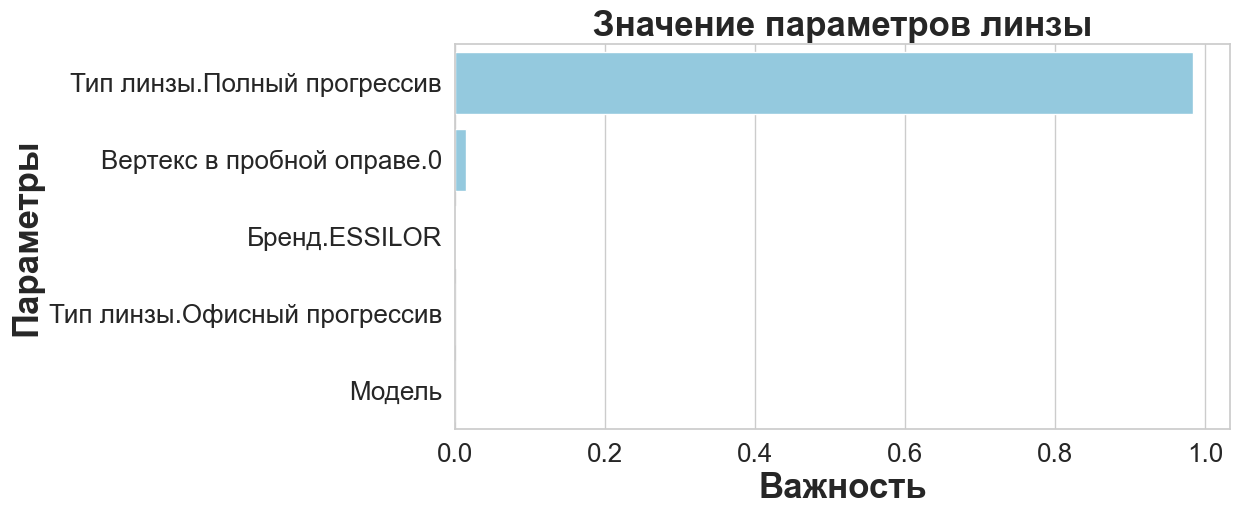

In [29]:
feats = {}
for feature, importance in zip(filtered_df.columns, dtc.feature_importances_):
    feats[feature] = importance
importances = pandas.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances = importances[:5]
seaborn.set(font_scale = 5)
seaborn.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = pyplot.subplots()
fig.set_size_inches(10, 5)
seaborn.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
pyplot.xlabel('Важность', fontsize=25, weight = 'bold')
pyplot.ylabel('Параметры', fontsize=25, weight = 'bold')
pyplot.title('Значение параметров линзы', fontsize=25, weight = 'bold')
pyplot.show()

# pyplot.savefig('feature_importance.png')
# PIL.Image.frombytes('RGB', fig.canvas.get_width_height(),fig.canvas.renderer.buffer_rgba()).save('feature_importance.png')

In [30]:
Source(export_graphviz(dtc, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = dtc.classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True))

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')

0

In [31]:
for column in packs_df.columns:
    print(column + ':')
    X_train = full_df.drop(columns=column_names).drop(columns='Модель').drop(columns='Пакет')
    Y_2_train = full_df[column]
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_2_train)

    filtered_df = full_df[full_df[column] != '']
    X_train = filtered_df.drop(columns=column_names).drop(columns='Модель').drop(columns='Пакет')
    Y_2_train = filtered_df[column]
    
    print('  ' + str(dtc.score(X_train, Y_2_train)))
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_2_train)
    
    print('  ' + str(dtc.score(X_train, Y_2_train)))

Пакет:
  0.387248322147651
  0.387248322147651
9387fdf5-d767-11ec-aafb-00155d001010:
  0.9187919463087248
  0.9187919463087248
9fe96dbf-d767-11ec-aafb-00155d001010:
  0.8328025477707006
  0.9617834394904459
f19841a1-d767-11ec-aafb-00155d001010:
  0.9885906040268456
  0.9885906040268456
cc9383b0-d767-11ec-aafb-00155d001010:
  0.6742934051144011
  0.6742934051144011
9d69454a-d764-11ec-aafb-00155d001010:
  0.9639498432601881
  1.0
d4ce77c1-f94a-11ec-aafc-00155d001010:
  0.5
  0.5
e0b39b9d-d767-11ec-aafb-00155d001010:
  0.2861635220125786
  0.6037735849056604
e9dbc16e-d767-11ec-aafb-00155d001010:
  0.10967741935483871
  0.4
fc49ff26-d767-11ec-aafb-00155d001010:
  0.69375
  0.70625
d30314aa-01cf-11ed-aafd-00155d001010:
  0.2222222222222222
  0.5
d7a013ad-d767-11ec-aafb-00155d001010:
  0.47619047619047616
  0.9047619047619048
dc870ce8-01cf-11ed-aafd-00155d001010:
  0.5
  0.5
0efa5815-daad-11ed-b5c9-0050560a2b59:
  0.75
  1.0
aa821c65-d767-11ec-aafb-00155d001010:
  1.0
  1.0
0311ed96-1d70-11e

In [32]:
def train_test_scores(model_producer):
    for column in packs_df.columns:
        filtered_df = full_df[full_df[column] != ''].drop_duplicates()
        X = filtered_df.drop(columns=column_names).drop(columns='Модель').drop(columns='Пакет')
        y = filtered_df[column]
        test_size = max(0.1, len(y.unique()) / len(y))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 13, stratify=y)
        
        model = model_producer()
        model.fit(X_train, y_train)
        
        print(column + ': ' + str(len(X)))
        print('  train: ' + str(model.score(X_train, y_train)))
        print('  test:  ' + str(model.score(X_test, y_test)))

In [33]:
train_test_scores(lambda: DecisionTreeClassifier())

Пакет: 1490
  train: 0.3885542168674699
  test:  0.3765432098765432
9387fdf5-d767-11ec-aafb-00155d001010: 1490
  train: 0.9246830723340791
  test:  0.8657718120805369
9fe96dbf-d767-11ec-aafb-00155d001010: 628
  train: 0.95929203539823
  test:  0.9841269841269841
f19841a1-d767-11ec-aafb-00155d001010: 1490
  train: 0.9888143176733781
  test:  0.9865771812080537
cc9383b0-d767-11ec-aafb-00155d001010: 1486
  train: 0.6776364996260285
  test:  0.6442953020134228
9d69454a-d764-11ec-aafb-00155d001010: 1276
  train: 1.0
  test:  1.0
d4ce77c1-f94a-11ec-aafc-00155d001010: 1486
  train: 0.518324607329843
  test:  0.33557046979865773
e0b39b9d-d767-11ec-aafb-00155d001010: 636
  train: 0.6031468531468531
  test:  0.609375
e9dbc16e-d767-11ec-aafb-00155d001010: 620
  train: 0.41935483870967744
  test:  0.22580645161290322
fc49ff26-d767-11ec-aafb-00155d001010: 960
  train: 0.7129629629629629
  test:  0.6458333333333334
d30314aa-01cf-11ed-aafd-00155d001010: 252
  train: 0.5265486725663717
  test:  0.2692

In [34]:
train_test_scores(lambda: RandomForestClassifier(min_impurity_decrease=0.02))

Пакет: 1490
  train: 0.02710843373493976
  test:  0.024691358024691357
9387fdf5-d767-11ec-aafb-00155d001010: 1490
  train: 0.9045488441461595
  test:  0.9060402684563759
9fe96dbf-d767-11ec-aafb-00155d001010: 628
  train: 0.9185840707964602
  test:  0.9682539682539683
f19841a1-d767-11ec-aafb-00155d001010: 1490
  train: 0.9656972408650261
  test:  0.9731543624161074
cc9383b0-d767-11ec-aafb-00155d001010: 1486
  train: 0.4951383694839192
  test:  0.4563758389261745
9d69454a-d764-11ec-aafb-00155d001010: 1276
  train: 0.8780487804878049
  test:  0.875
d4ce77c1-f94a-11ec-aafc-00155d001010: 1486
  train: 0.5003739715781601
  test:  0.4966442953020134
e0b39b9d-d767-11ec-aafb-00155d001010: 636
  train: 0.583916083916084
  test:  0.59375
e9dbc16e-d767-11ec-aafb-00155d001010: 620
  train: 0.3996415770609319
  test:  0.4032258064516129
fc49ff26-d767-11ec-aafb-00155d001010: 960
  train: 0.6770833333333334
  test:  0.6770833333333334
d30314aa-01cf-11ed-aafd-00155d001010: 252
  train: 0.5
  test:  0.5

In [35]:
rng = numpy.random.default_rng(13)

indexes = numpy.arange(len(full_df))
rng.shuffle(indexes)
[test_indexes, train_indexes] = numpy.split(indexes, [math.ceil(0.1 * len(full_df))])
full_train_df = full_df.iloc[train_indexes]
full_test_df = full_df.iloc[test_indexes]

In [36]:
models = {}

for column in column_names:
    print(column + ':')
    filtered_df = full_train_df[full_train_df[column] != '']
    
    if len(filtered_df) == 0:
        models[column] = None
        continue
        
    X_train = filtered_df.drop(columns=column_names).drop(columns='Модель').drop(columns='Пакет')
    Y_train = filtered_df[column]
    
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    models[column] = model
    print('  ' + str(model.score(X_train, Y_train)))

with open('model.pkl', 'wb') as f:
    pickle.dump(models, f,)


9387fdf5-d767-11ec-aafb-00155d001010:
  0.9224459358687547
9fe96dbf-d767-11ec-aafb-00155d001010:
  0.9680851063829787
f19841a1-d767-11ec-aafb-00155d001010:
  0.9888143176733781
cc9383b0-d767-11ec-aafb-00155d001010:
  0.6696562032884903
9d69454a-d764-11ec-aafb-00155d001010:
  1.0
d4ce77c1-f94a-11ec-aafc-00155d001010:
  0.5246636771300448
e0b39b9d-d767-11ec-aafb-00155d001010:
  0.607773851590106
e9dbc16e-d767-11ec-aafb-00155d001010:
  0.42028985507246375
fc49ff26-d767-11ec-aafb-00155d001010:
  0.7052023121387283
d30314aa-01cf-11ed-aafd-00155d001010:
  0.5398230088495575
d7a013ad-d767-11ec-aafb-00155d001010:
  0.9041095890410958
dc870ce8-01cf-11ed-aafd-00155d001010:
  0.6666666666666666
0efa5815-daad-11ed-b5c9-0050560a2b59:
  1.0
aa821c65-d767-11ec-aafb-00155d001010:
  1.0
0311ed96-1d70-11ed-aafd-00155d001010:
  0.3700787401574803


Инференс 
===

In [37]:
import pickle
from vec2pack import *

# Загрузка модели из файла pickle
with open('model.pkl', 'rb') as f:
    loadModels = pickle.load(f)

In [38]:
import pandas as pd

# Новые данные
input_df = pandas.DataFrame(
    columns=encoded.columns,
    index=['lens_name'],
    data={
        'Индекс преломления': [1.5],
        'Светопропускание.Поляризационные': [1]
})
input_df = input_df.fillna(0)

input_df

C:\Users\yaros\AppData\Local\Temp\ipykernel_33028\897654889.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df = input_df.fillna(0)


,"Degr.0,8","Degr.1,5",Бренд.TOKAI,Бренд.ESSILOR,Бренд.KEFF PREMIUM by RODENSTOCK,Бренд.NIKON,Бренд.KEFF WL,Вертекс в пробной оправе.0,Дизайн линзы.Прочее,Индивидуальность.Стандартные,...,Материал линзы ОЛ.Стекло,Материал линзы ОЛ.Поликарбонат,Минимальный коридор прогрессии.0,Положение оптического центра.По глазу,Положение оптического центра.По веку,Призма ОЛ.Нет,Светопропускание.Поляризационные,Тип линзы.Офисный прогрессив,Тип линзы.Полный прогрессив,Индекс преломления
lens_name,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.5


In [27]:
encoded.columns

Index(['Degr.0,8', 'Degr.1,5', 'Бренд.TOKAI', 'Бренд.ESSILOR',
       'Бренд.KEFF PREMIUM by RODENSTOCK', 'Бренд.NIKON', 'Бренд.KEFF WL',
       'Вертекс в пробной оправе.0', 'Дизайн линзы.Прочее',
       'Индивидуальность.Стандартные', 'Индивидуальность.Оптимизированные',
       'Индивидуальность.Индивидуальные', 'Исключения METS.Нет',
       'Исключения METS.Да', 'Материал линзы ОЛ.Полимер',
       'Материал линзы ОЛ.Стекло', 'Материал линзы ОЛ.Поликарбонат',
       'Минимальный коридор прогрессии.0',
       'Положение оптического центра.По глазу',
       'Положение оптического центра.По веку', 'Призма ОЛ.Нет',
       'Светопропускание.Поляризационные', 'Тип линзы.Офисный прогрессив',
       'Тип линзы.Полный прогрессив', 'Индекс преломления'],
      dtype='object')

Начало конца
===


In [39]:
# lens_name = '1.6 Lutina AS PGC-UV'
# lenses_with_name = encoded.loc[[lens_name]].reset_index()
# lenses = lenses_with_name.drop(columns='Модель')

# lenses = full_train_df[encoded.columns].reset_index(drop=True)
lenses = input_df.reset_index(drop=True)
display(lenses)
predicted_results_vec = []

for index, _ in lenses.iterrows():
    predicted_values_by_group = {}
    for column, model in loadModels.items():
        if model == None:
            predicted_values_by_group[column] = {}
            continue

        predicted_values_by_group[column] = {value: prob for prob, value in zip(model.predict_proba(lenses.iloc[[index]])[0], model.classes_)}

    predicted_results_vec.append(predicted_values_by_group)

# with open('predicted_values_by_group.json', 'w', encoding='utf_8') as file:
#     json.dump(predicted_results_vec, file, ensure_ascii=False, indent=4)

print(len(predicted_results_vec))
print(json.dumps(predicted_results_vec, ensure_ascii=False, indent=4))

,"Degr.0,8","Degr.1,5",Бренд.TOKAI,Бренд.ESSILOR,Бренд.KEFF PREMIUM by RODENSTOCK,Бренд.NIKON,Бренд.KEFF WL,Вертекс в пробной оправе.0,Дизайн линзы.Прочее,Индивидуальность.Стандартные,...,Материал линзы ОЛ.Стекло,Материал линзы ОЛ.Поликарбонат,Минимальный коридор прогрессии.0,Положение оптического центра.По глазу,Положение оптического центра.По веку,Призма ОЛ.Нет,Светопропускание.Поляризационные,Тип линзы.Офисный прогрессив,Тип линзы.Полный прогрессив,Индекс преломления
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.5


1
[
    {
        "9387fdf5-d767-11ec-aafb-00155d001010": {
            "Для близи": 0.1724137931034483,
            "Для дали": 0.8275862068965517,
            "Для имиджа/ Без диоптрий": 0.0,
            "Прогрессивные": 0.0
        },
        "9fe96dbf-d767-11ec-aafb-00155d001010": {
            "Без защиты от усталости": 1.0,
            "С линзами Relax": 0.0
        },
        "f19841a1-d767-11ec-aafb-00155d001010": {
            "Индивидуальные": 0.0,
            "Комфорт Лайт": 1.0,
            "Комфортные": 0.0,
            "Специальная конструкция ОЛ": 0.0,
            "Стандартные": 0.0
        },
        "cc9383b0-d767-11ec-aafb-00155d001010": {
            "Прозрачные": 1.0,
            "С защитой от компьютера": 0.0,
            "Солнцезащитные/Тонированные": 0.0,
            "Тонированные (Счастливый взгляд)": 0.0,
            "Фотохромные": 0.0,
            "Фотохромные+": 0.0
        },
        "9d69454a-d764-11ec-aafb-00155d001010": {
            "Базовые": 1.0,
     

In [40]:
vec2pack = Vec2Pack('СборДанныхBI_20250520_145108.XLSX')

predicted_results_pack = []

for pack_vec in predicted_results_vec:
    predicted_results_pack.append(vec2pack.get_package(pack_vec))

predicted_results_pack

['HD UV Basic ISee']

Тест API
===


In [41]:
import requests

def predict_model(data):
    url = 'http://5.159.103.200:5000/predict_model'

    # Отправка POST-запроса с данными в формате форм-данных
    response = requests.post(url, json=data)

    # Проверка статуса ответа
    if response.status_code == 200:
       return response.json()
    else:
       return {"error": f"Request failed with status code {response.status_code}"}

# Пример данных для предсказания
data = {
    'Degr0_8': 0,
    'Degr1_5': 0,
    'Brend_TOKAI': 0,
    'Brend_ESSILOR': 0,
    'Brend_KEFF_PREMIUM_by_RODENSTOCK': 0,
    'Brend_NIKON': 0,
    'Бренд.KEFF WL': 0,
    'Brend_KEFF_WL': 0,
    'Vertex_v_probnoi_oprave_0': 0,
    'Dizain_linzy_Prochee': 0,
    'Individualnost_Standartnye': 0,
    'Individualnost_Optimizirovannye': 0,
    'Individualnost_Individualnye': 0,
    'Isklucheniya_METS_Net': 0,
    'Isklucheniya_METS_Da': 0,
    'Material_linzy_OL_Polimer': 0,
    'Material_linzy_OL_Steklo': 0,
    'Material_linzy_OL_Polikarbons': 0,
    'Minimalnyi_koridor_progressii_0': 0,
    'Polozhenie_opticheskogo_tsentra_Po_glazu': 0,
    'Polozhenie_opticheskogo_tsentra_Po_veku': 0,
    'Prizma_OL_Net': 0,
    'Svetoproppuskaniye_Polarizatsionnye': 1,
    'Tip_linzy_Ofisnyi_progressiv': 0,
    'Tip_linzy_Polnyi_progressiv': 0,
    'Indeks_prelomleniya': 1.5
}

# Получение предсказания
prediction = predict_model(data)
print(prediction)

{'prediction': 'HD UV Basic ISee'}


Тестовая проверка на пакет 
===

In [ ]:
with open('selected_packages.json', encoding='utf_8') as file:
    predicted_results_pack_dejson = json.load(file)

predicted_results_pack = [pack for pack in predicted_results_pack_dejson]
success = 0

for lens, pack, _ in zip(lenses_with_name['Модель'], predicted_results_pack, range(100000)):
    packs = full_df.loc[full_df['Модель'] == lens]['Пакет'].unique()
    print(lens + ': ' + pack + '\n  ' + '\n  '.join(x for x in packs))
    success += 1 if pack in packs else 0

score = success / len(predicted_results_pack)
score

1.6 Lutina AS PGC-UV: HD UV Slim Skylight Digital
  HD UV Slim Skylight Digital


1.0